# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | glendive
Processing Record 2 of Set 1 | kismayo
Processing Record 3 of Set 1 | codrington
Processing Record 4 of Set 1 | ouellah
City not found. Skipping...
Processing Record 5 of Set 1 | tangalle
Processing Record 6 of Set 1 | dudinka
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | altar
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | alta
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | alofi
Processing Record 13 of Set 1 | chibougamau
Processing Record 14 of Set 1 | saipan
Processing Record 15 of Set 1 | harper
Processing Record 16 of Set 1 | castillos
Processing Record 17 of Set 1 | kidal
Processing Record 18 of Set 1 | stanley
Processing Record 19 of Set 1 | isafjordur
Processing Record 20 of Set 1 | petropavlovsk-kamchatsky
Processing Record 21 of Set 1 | gradistea
Processing Record 22 of Set 1 | vilyuchinsk
P

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,glendive,47.1053,-104.7125,25.79,19,0,4.12,US,1729116575
1,kismayo,-0.3582,42.5454,25.15,84,55,7.25,SO,1729116576
2,codrington,-38.2667,141.9667,18.26,88,100,4.00,AU,1729116577
3,tangalle,6.0240,80.7911,24.74,92,61,3.97,LK,1729116580
4,dudinka,69.4058,86.1778,-13.10,93,100,6.22,RU,1729116581


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,glendive,47.1053,-104.7125,25.79,19,0,4.12,US,1729116575
1,kismayo,-0.3582,42.5454,25.15,84,55,7.25,SO,1729116576
2,codrington,-38.2667,141.9667,18.26,88,100,4.00,AU,1729116577
3,tangalle,6.0240,80.7911,24.74,92,61,3.97,LK,1729116580
4,dudinka,69.4058,86.1778,-13.10,93,100,6.22,RU,1729116581


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

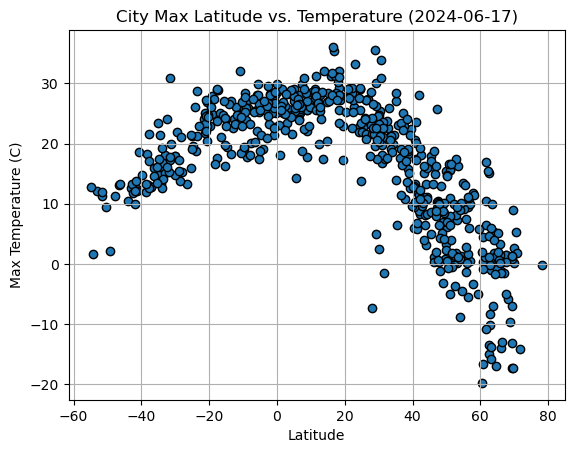

In [19]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-06-17)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
    
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

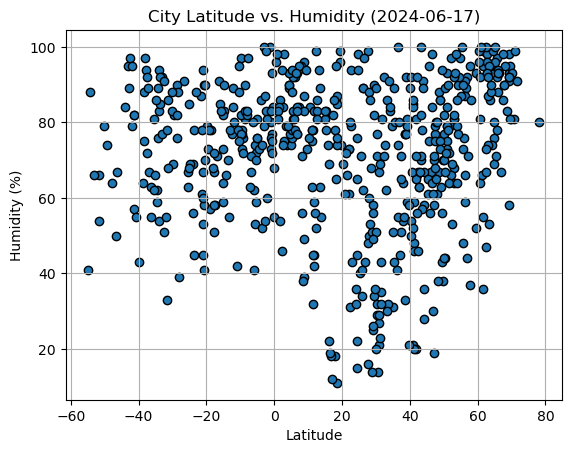

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
    
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

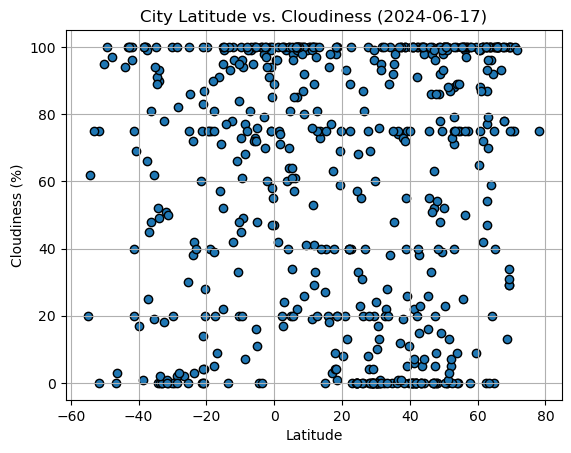

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

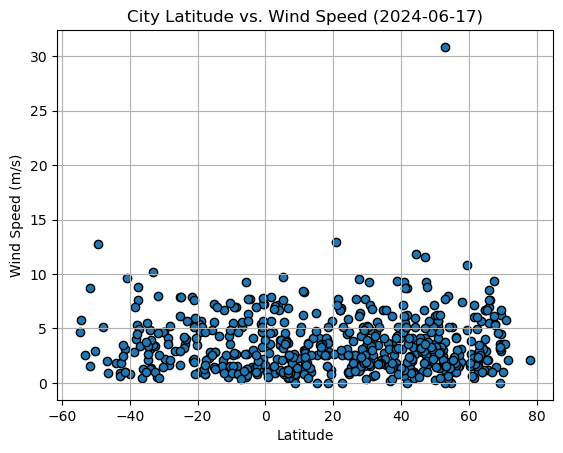

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [95]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label):

    #Perform Linear Regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    #Regression line for plotting
    regression_line = slope * np.array(x_values) + intercept

    #Annotation equation & coordinates
    line_equat = f"y = {round(slope,2)}x + {round(intercept,2)}"

    if slope >=0:
        plt.annotate(line_equat,(min(x_values),max(y_values)*.95),fontsize=15,color="red")
    else:
        plt.annotate(line_equat,(min(x_values),min(y_values)),fontsize=15,color="red")

    #Print R^2 Value
    print(f"The r^2-value is: {rvalue**2}")

    #Create plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regression_line, color="red")

    #Title and labels
    plt.title(f"{x_label} vs {y_label}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    #Show plot
    plt.show()

In [96]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,glendive,47.1053,-104.7125,25.79,19,0,4.12,US,1729116575
3,tangalle,6.0240,80.7911,24.74,92,61,3.97,LK,1729116580
4,dudinka,69.4058,86.1778,-13.10,93,100,6.22,RU,1729116581
6,altar,30.7000,-111.8167,33.93,14,17,9.23,MX,1729116583
8,alta,69.9689,23.2717,2.59,81,100,1.03,NO,1729116586


In [97]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kismayo,-0.3582,42.5454,25.15,84,55,7.25,SO,1729116576
2,codrington,-38.2667,141.9667,18.26,88,100,4.00,AU,1729116577
5,adamstown,-25.0660,-130.1015,21.24,85,100,7.92,PN,1729116582
7,grytviken,-54.2811,-36.5092,1.71,88,62,5.81,GS,1729116585
9,port-aux-francais,-49.3500,70.2167,2.21,74,100,12.72,TF,1729116587


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.6918415939722693


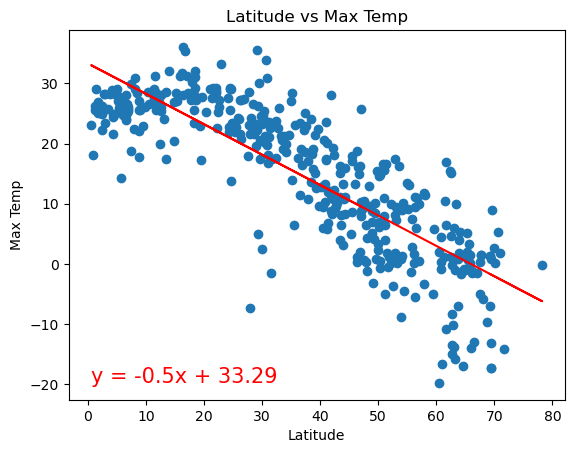

In [98]:
# Linear regression on Northern Hemisphere
# variables for x-axis / y-axis
x_label = "Latitude"
y_label = "Max Temp"
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Linear regression function
plot_linear_regression(x_values, y_values, x_label, y_label)

The r^2-value is: 0.6044373189114598


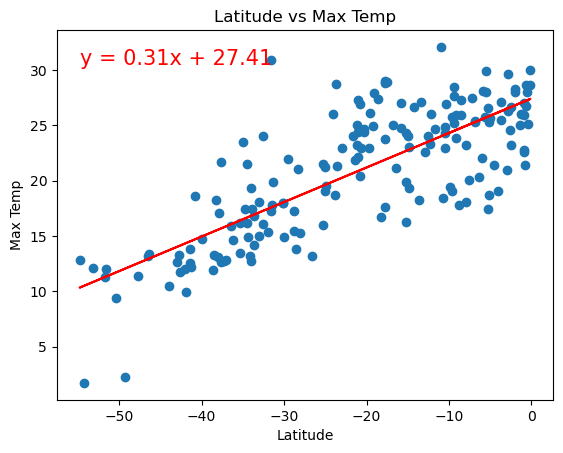

In [99]:
# Linear regression on Southern Hemisphere
# variables for x-axis / y-axis
x_label = "Latitude"
y_label = "Max Temp"
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Linear regression function
plot_linear_regression(x_values, y_values, x_label, y_label)

**Discussion about the linear relationship:** As observed in the Temperature vs. Latitude Linear Regression Plots for both the northern and southern hemispheres, moving away from the equator shows a negative slope, indicating a decrease in temperature. In the northern hemisphere, as latitude increases (moving away from the equator), temperatures drop. Similarly, in the southern hemisphere, as latitude decreases (moving away from the equator), temperatures also decrease. These linear regression plots support the understanding that tropical regions, located near the equator, experience warmer temperatures, while regions further from the equator, in either direction, experience progressively cooler temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.020330345755928996


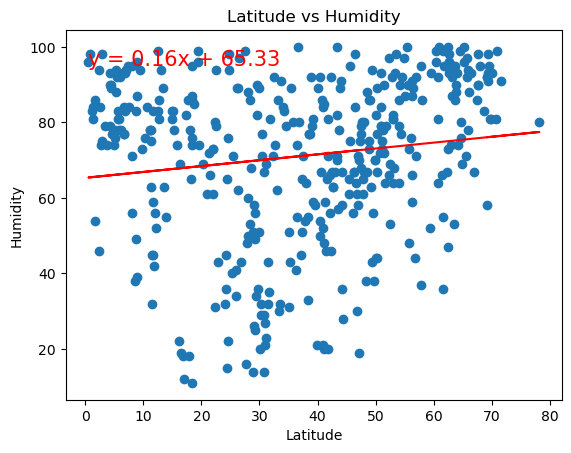

In [105]:
# Northern Hemisphere
x_label = "Latitude"
y_label = "Humidity"
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#Linear regression function
plot_linear_regression(x_values, y_values, x_label, y_label)

The r^2-value is: 0.00578500275145995


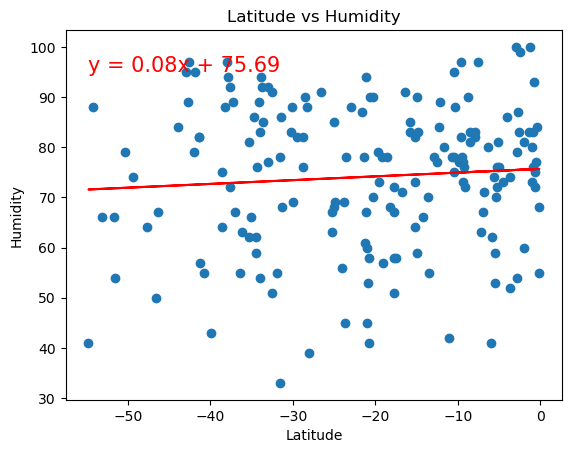

In [107]:
# Southern Hemisphere
x_label = "Latitude"
y_label = "Humidity"
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Linear regression function
plot_linear_regression(x_values, y_values, x_label, y_label)

**Discussion about the linear relationship:** As observed in the Humidity vs. Latitude Linear Regression Plots, in the Northern Hemisphere, the graphs show that humidity tends to increase as you move away from the equator, while in the Southern Hemisphere, humidity only slightly decreases with increasing distance from the equator. This pattern may be influenced by the current seasons, with the Northern Hemisphere in fall and the Southern Hemisphere in spring. As the temperatures increase in spring and decrease in fall, this can impact humidity levels in those regions.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.005736614267446532


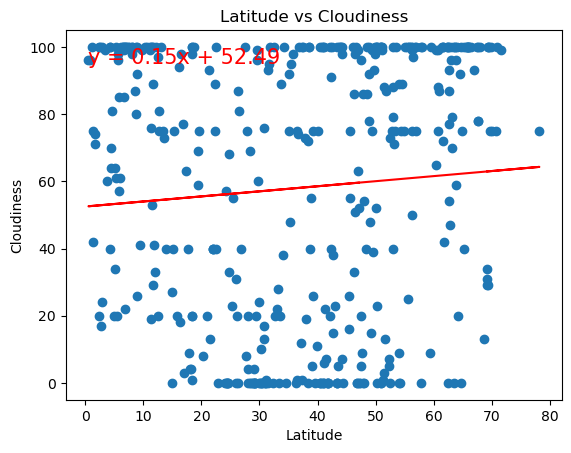

In [108]:
# Northern Hemisphere
x_label = "Latitude"
y_label = "Cloudiness"
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#Linear regression function
plot_linear_regression(x_values, y_values, x_label, y_label)

The r^2-value is: 0.034929166747556625


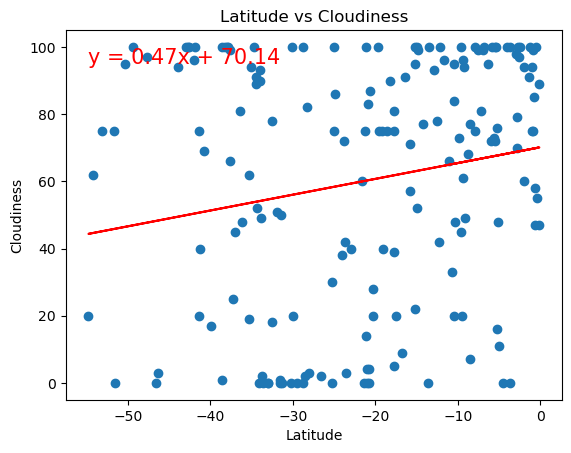

In [109]:
# Southern Hemisphere
x_label = "Latitude"
y_label = "Cloudiness"
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Linear regression function
plot_linear_regression(x_values, y_values, x_label, y_label)

**Discussion about the linear relationship:** As observed in the Cloudiness vs. Latitude Linear Regression Plots, in the Northern Hemisphere, the graphs show that cloudiness tends to increase as you move away from the equator, while in the Southern Hemisphere, cloudiness appears to decrease with increasing distance from the equator. This pattern may also be influenced by the current seasons, with the Northern Hemisphere in fall and the Southern Hemisphere in spring. As weather cools down in the Northern Hemisphere in the fall, there are potentially more precipitation and storms, which could contribute to an increase in cloudiness. And as the weather gets warmer in the Southern Hemisphere in the summer, there may be a greater likelihood for clear skies and lower cloud cover.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0034389773526290867


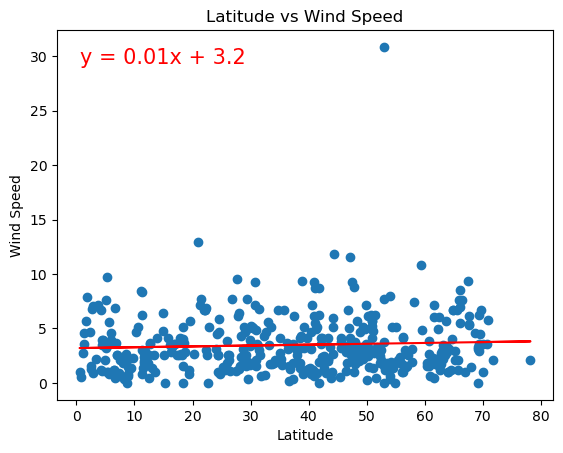

In [110]:
# Northern Hemisphere
x_label = "Latitude"
y_label = "Wind Speed"
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#Linear regression function
plot_linear_regression(x_values, y_values, x_label, y_label)

The r^2-value is: 0.0026375711644055014


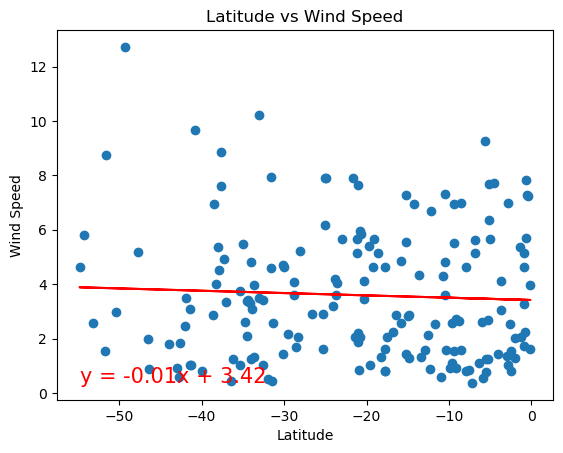

In [111]:
# Southern Hemisphere
x_label = "Latitude"
y_label = "Wind Speed"
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#Linear regression function
plot_linear_regression(x_values, y_values, x_label, y_label)

**Discussion about the linear relationship:** As observed in the Wind Speed vs. Latitude Linear Regression Plots, there appears to be only a slight increase in wind speed in both the Northern and Southern Hemispheres as one moves away from the equator. As there does not appear to be a strong correlation between latitude and wind speed, this would indicate that there are most likely other factors at play that play a more significant role in influencing wind patterns. 